# Assignment-Multi-Threading
The "Matrix Multiplication Performance Benchmark" project aims to thoroughly assess the impact of multi-threading on the efficiency of matrix multiplication operations. Matrix multiplication is a fundamental mathematical operation widely used in various fields such as mathematics, physics, engineering, and computer science. The performance of matrix multiplication can significantly influence the overall efficiency of computational tasks, especially in applications involving large-scale data processing and numerical simulations.

This project explores how parallelization techniques, specifically multi-threading, can improve the performance of matrix multiplication algorithms. By leveraging Python libraries such as NumPy, threading, and Pandas, the project conducts extensive benchmarking experiments to analyze the effects of multi-threading on computation time and CPU utilization. The findings of this investigation are crucial for understanding the scalability and efficiency of matrix multiplication algorithms in multi-core computing environments. <br><br>

In [1]:
import numpy as np
import pandas as pd
import time
import threading
import random as r
import psutil
import matplotlib.pyplot as plt

In [2]:
def generate_random_matrices(n, size):
    matrices = []
    for _ in range(n):
        matrices.append(np.random.rand(size, size))
    return matrices

def multiply_matrices(matrices):
    constant_matrix = np.random.rand(matrix_size, matrix_size)
    result = constant_matrix.copy()
    for matrix in matrices:
        result = np.dot(result, matrix)
    return result

def perform_multiplication_with_threads(num_threads, matrices):
    """
    Performs matrix multiplication using multiple threads.

    Parameters:
    num_threads (int): Number of threads to use.
    matrices (list): List of matrices to multiply.

    Returns:
    float: Time taken to perform multiplication.
    """
    start_time = time.time()
    threads = []
    for i in range(0, len(matrices), num_threads):
        thread = threading.Thread(target=multiply_matrices, args=(matrices[i:i+num_threads],))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

In [3]:
num_matrices = 100
matrix_size = 1000
matrices=generate_random_matrices(num_matrices,matrix_size)

In [4]:
# Get the number of CPU cores
import multiprocessing
num_cores = multiprocessing.cpu_count()
num_cores

24

In [ ]:
# Perform multiplication with different numbers of threads
results = {}
cpu_usages = {}
for num_threads in range(1, num_cores + 1):
    # Monitor CPU usage
    start_cpu_usage = psutil.cpu_percent()
    initaAactiveThread = threading.activeCount()
    time_taken = perform_multiplication_with_threads(num_threads, matrices)
    end_cpu_usage = psutil.cpu_percent()
    while True:
        if threading.activeCount() == initaAactiveThread:
            break
        else:
            print ("    Thread still running (left %d)..."%(threading.activeCount() - initaAactiveThread))
            time.sleep(1)
    results[num_threads] = time_taken
    cpu_usages[num_threads] = (start_cpu_usage + end_cpu_usage) / 2  # Average CPU usage during the operation

C:\Users\rajne\AppData\Local\Temp\ipykernel_21340\1823317380.py:7: DeprecationWarning: activeCount() is deprecated, use active_count() instead
  initaAactiveThread = threading.activeCount()
C:\Users\rajne\AppData\Local\Temp\ipykernel_21340\1823317380.py:11: DeprecationWarning: activeCount() is deprecated, use active_count() instead
  if threading.activeCount() == initaAactiveThread:


In [18]:
# Create DataFrame
df = pd.DataFrame.from_dict(results, orient='index', columns=['Time Taken (s)'])
df['CPU Usage (%)'] = cpu_usages
df.index.name = 'Threads'

In [19]:
# Print the results
print("Time taken for matrix multiplication with varying number of threads and CPU usage:")
print(df)

Time taken for matrix multiplication with varying number of threads and CPU usage:
         Time Taken (s)  CPU Usage (%)
Threads                               
1              2.333440          17.10
2              2.279196          16.40
3              2.269969          16.75
4              2.264986          24.95
5              2.233839          16.50
6              2.240188          16.50
7              2.229397          16.55
8              2.271317          16.30
9              2.246393          16.55
10             2.233568          28.95
11             2.226660          16.45
12             2.229617          16.65
13             2.221955          16.55
14             2.207041          16.55
15             2.225003          16.50
16             2.189931          16.50
17             2.198998          16.45
18             2.201996          16.60
19             2.195001          16.55
20             2.190093          16.55
21             2.178915          16.50
22             2.194

### Time taken vs Number of threads
Time taken vs Number of Threads: Shows how the time taken for matrix multiplication varies with the number of threads.

Text(0.5, 1.0, 'Time Taken vs Number of Threads')

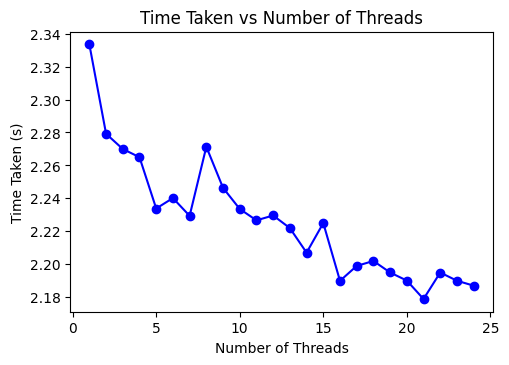

In [20]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Time Taken (s)'], marker='o', color='b')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Number of Threads')

### CPU Usage vs Number of Threads

Text(0.5, 1.0, 'CPU Usage vs Number of Threads')

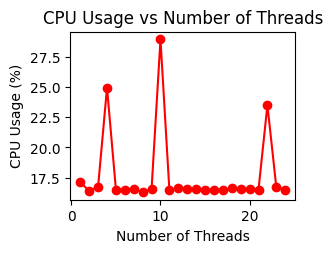

In [21]:
plt.subplot(2, 2, 2)
plt.plot(df.index, df['CPU Usage (%)'], marker='o', color='r')
plt.xlabel('Number of Threads')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage vs Number of Threads')

### Speedup
Speedup vs Number of Threads: Calculates speedup as the ratio of the time taken with one thread to the time taken with varying numbers of threads, showing how the computation speed scales with increasing threads.

Text(0.5, 1.0, 'Speedup vs Number of Threads')

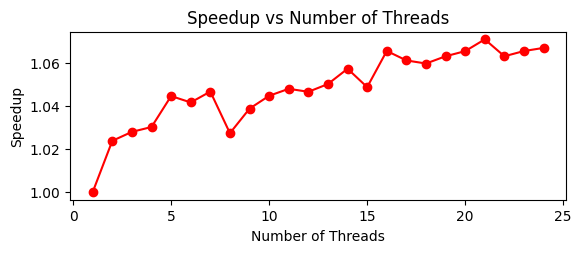

In [22]:
# Plot 2: Speedup
speedup = df.iloc[0, 0] / df['Time Taken (s)']
plt.subplot(2, 1, 2)
plt.plot(df.index, speedup, marker='o', color='r')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Threads')

### Efficiency
Efficiency measures how effectively the available resources are utilized. It's calculated as the ratio of speedup to the number of threads used.

Text(0.5, 1.0, 'Efficiency vs Number of Threads')

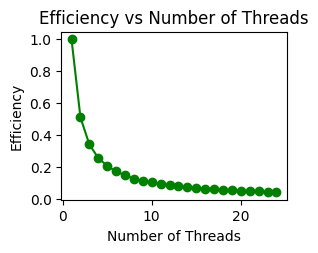

In [23]:
efficiency = speedup / df.index
plt.subplot(2, 2, 3)
plt.plot(df.index, efficiency, marker='o', color='g')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Threads')

### Scalability
Scalability shows how well the system can handle an increasing workload. It's represented by the inverse of the time taken, demonstrating how performance scales with the number of threads.

Text(0.5, 1.0, 'Scalability vs Number of Threads')

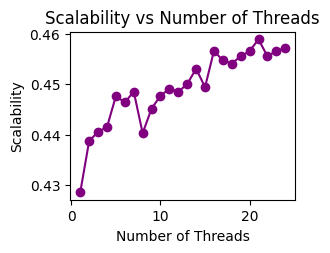

In [24]:
# Plot 4: Scalability
scalability = 1 / df['Time Taken (s)']
plt.subplot(2, 2, 4)
plt.plot(df.index, scalability, marker='o', color='purple')
plt.xlabel('Number of Threads')
plt.ylabel('Scalability')
plt.title('Scalability vs Number of Threads')